Archivo cargado correctamente.
Encabezados del archivo: Index(['Lenguaje', 'Usage'], dtype='object')
Columna 'Usage' procesada correctamente.
Pendiente (coeficiente): -1.7607341490545048
Intercepto: 42.00804597701149


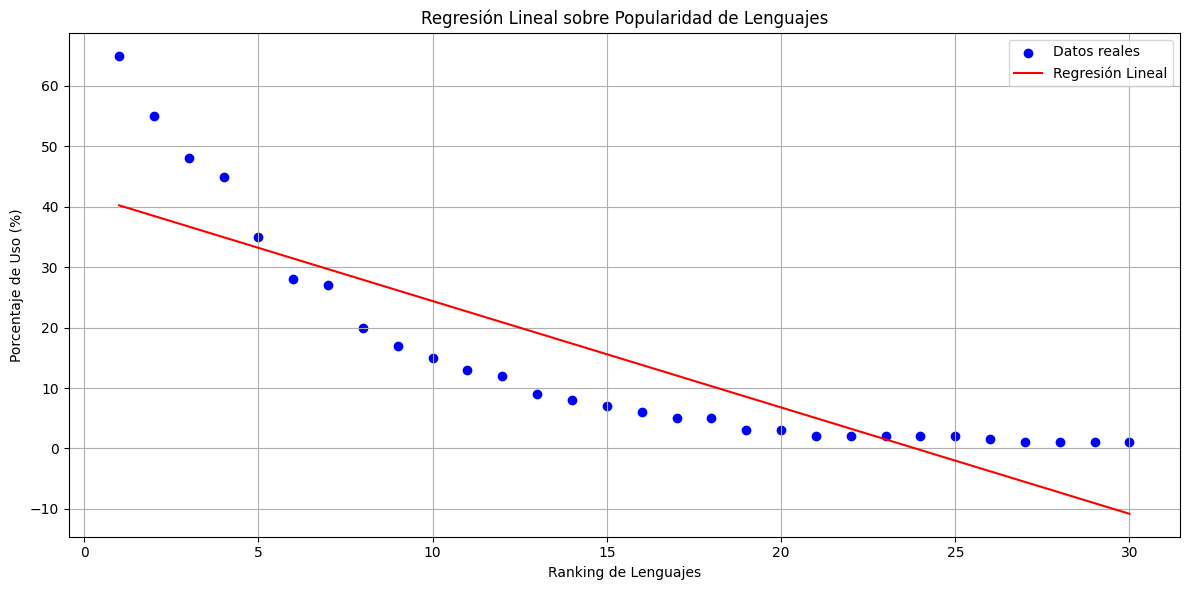

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Cargar el archivo CSV
archivo_csv = "Lenguaje.csv"  # Cambia esto a la ubicación real de tu archivo CSV
try:
    df = pd.read_csv(archivo_csv)
    print("Archivo cargado correctamente.")
except FileNotFoundError:
    print(f"El archivo '{archivo_csv}' no se encontró. Verifica la ruta.")
    exit()

# Verificar encabezados y estructura
print("Encabezados del archivo:", df.columns)
if "Lenguaje" not in df.columns or "Usage" not in df.columns:
    print("El archivo debe contener las columnas 'Lenguaje' y 'Usage'.")
    exit()

# Limpieza y validación de la columna "Usage"
try:
    df["Usage"] = df["Usage"].str.replace('%', '', regex=False).astype(float)
    print("Columna 'Usage' procesada correctamente.")
except AttributeError:
    print("Error al procesar la columna 'Usage'. Verifica que los datos estén en el formato correcto.")
    exit()
except ValueError:
    print("Algunos valores en la columna 'Usage' no son numéricos. Revisa el archivo CSV.")
    exit()

# Crear un índice ficticio para la regresión
df = df.sort_values(by="Usage", ascending=False).reset_index(drop=True)
df["Ranking"] = np.arange(1, len(df) + 1)

# Separar las variables independiente (Ranking) y dependiente (Usage)
X = df[["Ranking"]].values  # Variable independiente
y = df["Usage"].values       # Variable dependiente

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Generar predicciones
y_pred = model.predict(X)

# Mostrar los coeficientes del modelo
print("Pendiente (coeficiente):", model.coef_[0])
print("Intercepto:", model.intercept_)

# Graficar los datos reales y la regresión lineal
plt.figure(figsize=(12, 6))
plt.scatter(df["Ranking"], df["Usage"], color="blue", label="Datos reales")
plt.plot(df["Ranking"], y_pred, color="red", label="Regresión Lineal")

# Etiquetas y título
plt.xlabel("Ranking de Lenguajes")
plt.ylabel("Porcentaje de Uso (%)")
plt.title("Regresión Lineal sobre Popularidad de Lenguajes")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
